# Face Recognition using Support Vector Machine
- Faces recognition example


In [18]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')                       # ignore warnings 

from sklearn.datasets import fetch_lfw_people           # fetch_lfw_people is the dataset

faces = fetch_lfw_people(min_faces_per_person=60)       # get the data, with 60 images per person 

print(faces.target_names)

print(faces.images.shape)


['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


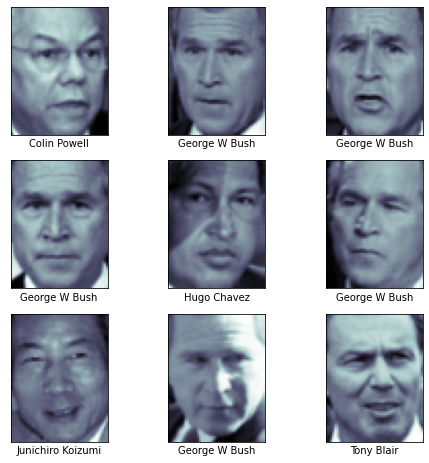

In [20]:
# create grid of 3 x 3 to sohw images 
fig, ax = plt.subplots(3, 3,figsize=(8,8))

for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

## Notes
 - Each image is 62 X 47 pixels.
 - Images will be presented as a one feature vector of size  62𝑋47=2914 .
 - Principle Component Analysis (PCA) is an important method, that simply used to reduce the dimension of the data, without causing much information loss.
 -  PCA reduce the dimension of our data from almost 3000 into only 150 .
 - Then it will feed it into our Support Vector Machine.
 - The label or  𝑦  is the name of the person in the image.
 
 

In [21]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

# create dimenssion reduction 
pca = PCA(n_components=150, whiten=True, random_state=42)
# create your SVM model with RBF kernel 
svc = SVC(kernel='rbf', class_weight='balanced')
# pipeline defined by make_pipeline method 
model = make_pipeline(pca, svc)

## Train / Test Split
As always, it is important to keep part of our dataset for testing and validation of our model’s performance: 

In [28]:
from sklearn.model_selection import train_test_split
# random_state is for results reproduction 
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target,
                                                random_state=50)
# check the shape of the data
print(f'The size of the Training set is :{X_train.shape[0]}')
print(f'The size of the Training set is :{X_test.shape[0]}')
print(f'The number of columns in the training and testing set is :{X_train.shape[1]}\n')

# The data types of X_train / y_train (numpy array)

print(f'Type of X_train {type(X_train)}')
print(f'Type of y_train {type(y_train)}')

The size of the Training set is :1011
The size of the Training set is :337
The number of columns in the training and testing set is :2914

Type of X_train <class 'numpy.ndarray'>
Type of y_train <class 'numpy.ndarray'>


## Hyperparameter Tuning
- C and gamma parameters are important for the performance of the module. 
- We will use grid search to get the best set of parameters.

In [30]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

warnings.filterwarnings('ignore')# ignore warnings 

grid.fit(X_train, y_train)
best_params = grid.best_params_

# check best parameters
print(best_params)

{'svc__C': 5, 'svc__gamma': 0.001}


## Best Model Fit
- To predict the labels (names) of the test images

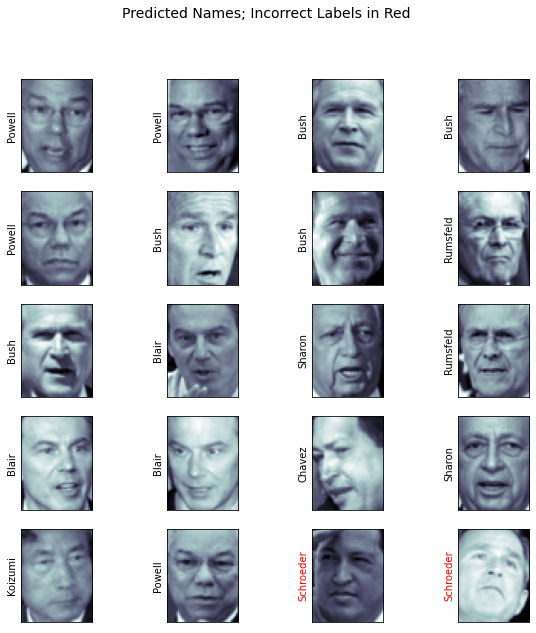

In [32]:
# best model we have 
model = grid.best_estimator_
y_predicted = model.predict(X_test)

fig, ax = plt.subplots(5, 4,figsize=(10,10))
for i, axi in enumerate(ax.flat):
    axi.imshow(X_test[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[y_predicted[i]].split()[-1],
                   color='black' if y_predicted[i] == y_test[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

* Lest now look at evaluation metrics to assess the quality of our model: 

In [33]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predicted,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.78      0.86      0.82        21
     Colin Powell       0.78      0.88      0.83        59
  Donald Rumsfeld       0.72      0.80      0.76        35
    George W Bush       0.92      0.84      0.88       119
Gerhard Schroeder       0.74      0.81      0.77        21
      Hugo Chavez       0.96      0.85      0.90        27
Junichiro Koizumi       1.00      0.75      0.86        20
       Tony Blair       0.81      0.86      0.83        35

         accuracy                           0.84       337
        macro avg       0.84      0.83      0.83       337
     weighted avg       0.85      0.84      0.84       337



*  the confusion matrix :

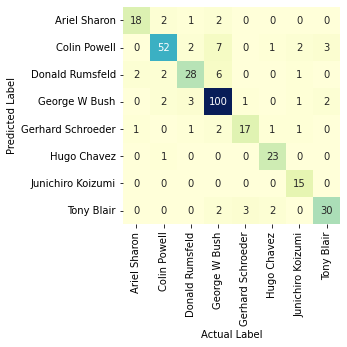

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# compare the actual label against the predicted label
mat = confusion_matrix(y_test, y_predicted)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,cmap="YlGnBu",
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label');

* A code to view specific image (change `i`) 

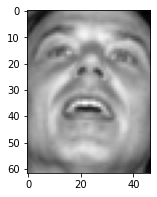

In [44]:
# you can save your test set as a data frame as below
df = pd.DataFrame(X_test)

# add the label 
df['Label']=y_test

# set figure size 
fig = plt.figure(figsize=(3,3))

# split features and labels into two differen dataframes 
features = df.loc[:, df.columns != 'Label']
labels = df['Label'].to_numpy()

# Change i to view different images 
i = 40

# notice we convert it to numpy array and reshape it
image_to_show = features.iloc[i].to_numpy()

# reshape it to fit our model
image_to_show = image_to_show.reshape(62,47)

#fig.suptitle('This is ',labels[0:1], size=14);
label= faces.target_names[labels[i]]
if 1==1:
    color='black'
else:
    color = 'red'
    
#fig.suptitle(label, size=14);
plt.imshow(image_to_show, cmap=plt.get_cmap('gray'))
plt.show()  